# Red Wine Quality Project

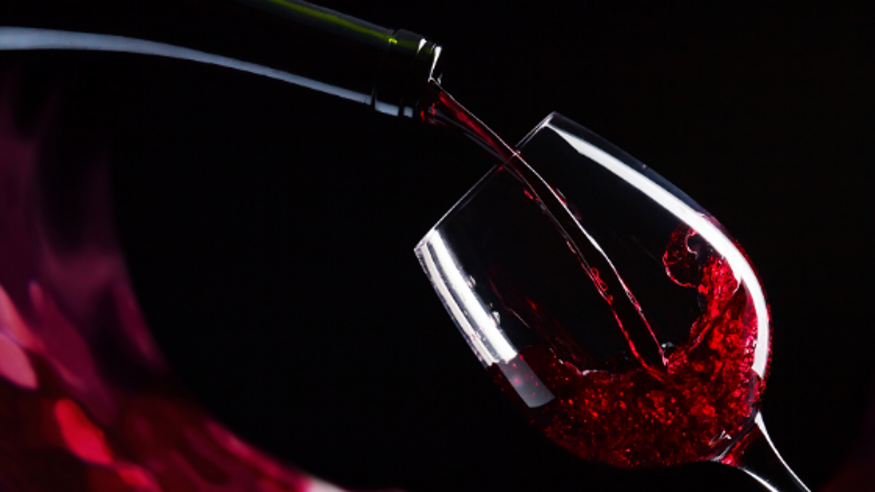

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None


### My project examines the relationship between the various parts and ingreidents of wine and its quality.
### It aims to predict the quality of the wine using these parts.
#### My hypothesis is that alcohol levels will have the largest affect on wine quality.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### when i first attempted to read my csv file, it did not have a proper layout

In [3]:
df = pd.read_csv('winequality-red.csv').head() #open data
df

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


### I fixed the layout by setting the delimiter as a ';' because that was how each column was seperated above

In [4]:
 #file was not opening correctly, all in one column
df = pd.read_csv('winequality-red.csv', delimiter = ';')

def quality(i):
    if(i<=4):
        return 0
    elif(i>4 and i<=7):
        return 1
    else:
        return 2
df['whatQ'] = df['quality'].apply(quality)
df.head(5) #it was fixed by delimiter = ; to spread it out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,whatQ
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Then, I found the correlation of each column

In [5]:
cor = df.corr() #correlation
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,whatQ
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.052590
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.222998
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.119277
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.016897
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.051369
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.051790
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.044545
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.035580
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.097805
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.101258


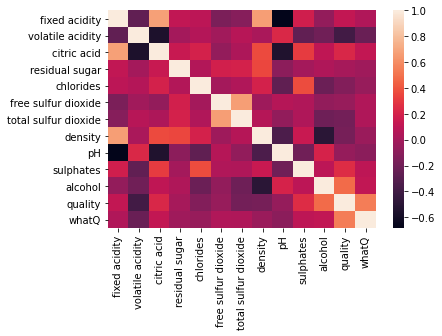

In [6]:
sns.heatmap(cor)

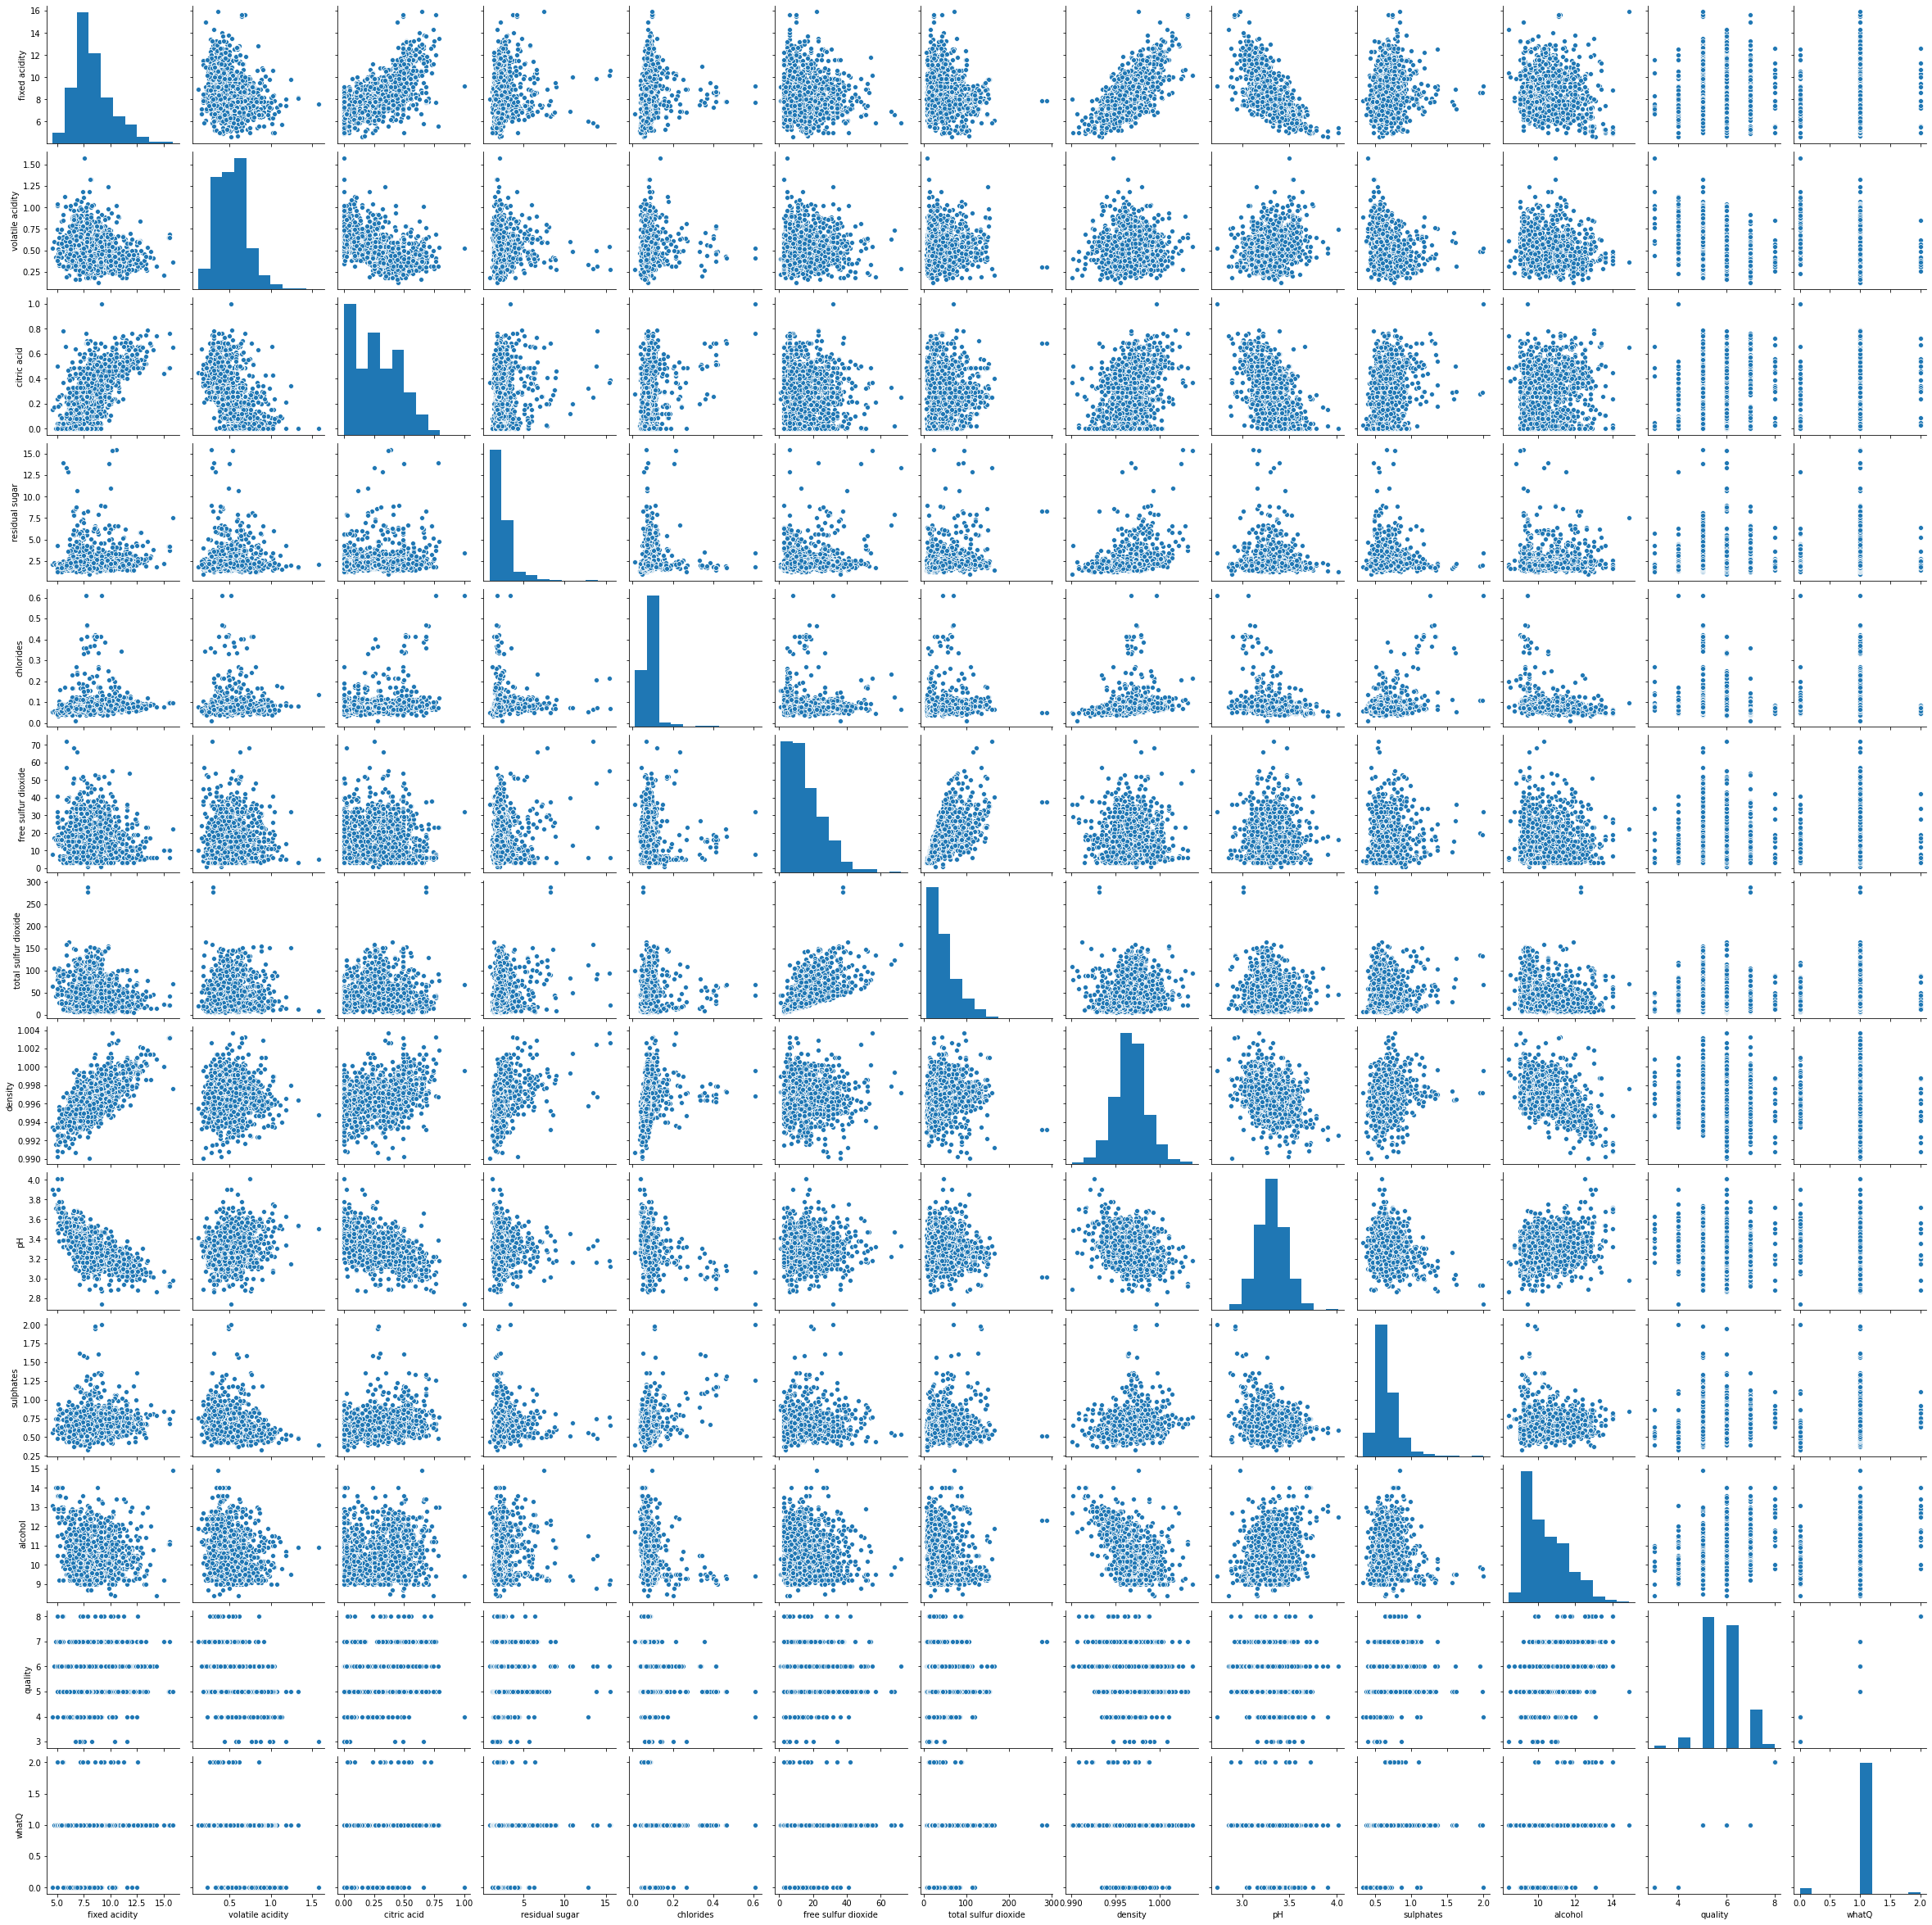

In [7]:
sns.pairplot(df)

# Initial KNN Trial

### My initiall KNN trial (below) yielded only 51% accuracy...

In [57]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = df['quality']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # .2 test size

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) #Set to 3 neighbors

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
yPredict = knn.predict(X_test)

In [62]:
expectedYvalues = y_test
expectedYvalues

1109    6
1032    5
1002    7
487     6
979     5
       ..
794     6
813     4
1322    5
704     4
1023    6
Name: quality, Length: 320, dtype: int64

In [63]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(expectedYvalues, yPredict)) 
#Each row of the confusion matrix represents the instances of an actual class and each column represents 
#the instances of a predicted class.

[[ 0  0  2  0  0  0]
 [ 0  1  8  2  0  0]
 [ 3  2 89 37  4  0]
 [ 1 12 55 64  9  1]
 [ 0  3  5  9 10  0]
 [ 0  0  0  1  2  0]]


In [64]:
print(knn.score(X_test, y_test))

0.5125


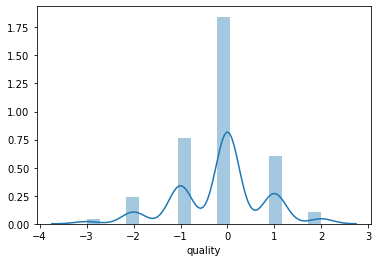

In [65]:
sns.distplot(yPredict-expectedYvalues) #most incorrect were just one place away

plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
pred=knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.09      0.07        11
           5       0.56      0.66      0.61       135
           6       0.57      0.45      0.50       142
           7       0.40      0.37      0.38        27
           8       0.00      0.00      0.00         3

    accuracy                           0.51       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.52      0.51      0.51       320



### Obviously, 51% accuracy is not the best. Is there a way to make this more accurate while still using KNN?

# KNN Fixed
#### You'll remember at the top I used a .apply method to classify wine into 3 ranks, now you'll see why:

#### made 3 variables - 0 is low quality, 1 is medium, 3 is good --> (x<=4), (4<x<=7), (x>7)

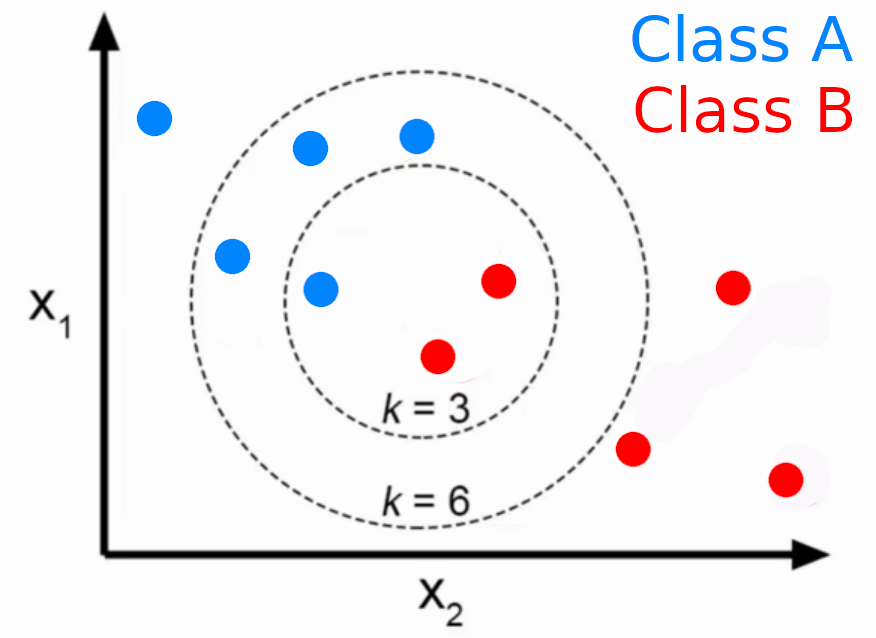

# KNN

In [18]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = df['whatQ']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) #Set to 3 neighbors

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
yPredict = knn.predict(X_test)
yPredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
expectedYvalues = y_test
expectedYvalues

1109    1
1032    1
1002    1
487     1
979     1
       ..
794     1
813     0
1322    1
704     0
1023    1
Name: whatQ, Length: 320, dtype: int64

In [24]:
metrics.confusion_matrix(y_test, yPredict)

array([[  0,  13,   0],
       [  1, 302,   1],
       [  0,   3,   0]])

In [25]:
print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


In [26]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(expectedYvalues, yPredict))

[[  0  13   0]
 [  1 302   1]
 [  0   3   0]]


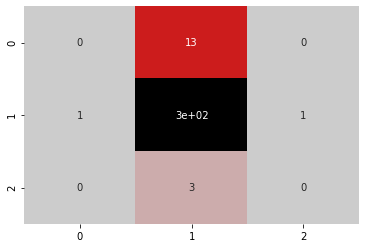

In [27]:
import seaborn as sns

sns.heatmap(confusion_matrix(expectedYvalues, yPredict), cmap = 'nipy_spectral_r', cbar = False, annot = True);

In [28]:
print(knn.score(X_test, y_test))

0.94375


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
pred=knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.95      0.99      0.97       304
           2       0.00      0.00      0.00         3

    accuracy                           0.94       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.94      0.92       320



# with the new rating system, my KNN trial achieved 94.375% accuracy!
### The question is, can this get better?

In [30]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=11) #n_splits = 10 means the number of folds

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


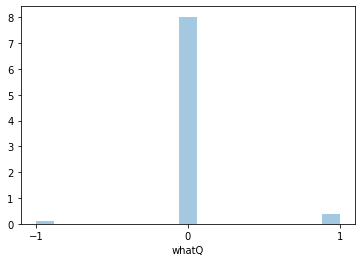

In [31]:
sns.distplot(yPredict-expectedYvalues)
plt.xticks([-1,0,1])
plt.show() #most are only one place away

In [32]:
import numpy as np

errorLst = []

for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    errorLst.append(np.mean(pred!=y_test)) #number of times number of values is true or false mean

errorLst

[0.1, 0.05625, 0.053125, 0.053125, 0.05, 0.053125, 0.05, 0.05, 0.05, 0.05]

Text(0, 0.5, 'Accuracy')

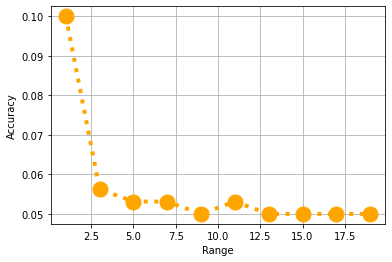

In [33]:
plt.plot(range(1,20,2),errorLst, 'orange', marker = 'o', linestyle='dotted', markersize = 15, linewidth = 4)
plt.grid()
plt.xlabel('Range')
plt.ylabel('Accuracy')

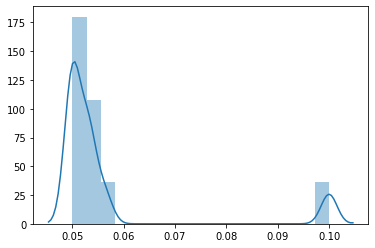

In [34]:
sns.distplot(errorLst)

# While 94% accuracy was good, I was curious how logistic regression would compare to KNN in this situation

# Logistic

In [35]:
# split into 0,1,2 - bad, Medium, good quality

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,whatQ
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [37]:
df = pd.read_csv('winequality-red.csv', delimiter = ';')

def quality(i):
    if(i<=4):
        return 0
    elif(i>4 and i<=7):
        return 1
    else:
        return 2
df['whatQ'] = df['quality'].apply(quality)
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,whatQ
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [38]:
df.drop('quality', axis = 1, inplace = True) #called onehotEncoding technique
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,whatQ
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [39]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = df['whatQ']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
cor = df.corr()

In [41]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
yPredict = logmodel.predict(X_test)

In [43]:
confusion_matrix(y_test, yPredict)

array([[  0,  13,   0],
       [  0, 304,   0],
       [  0,   3,   0]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


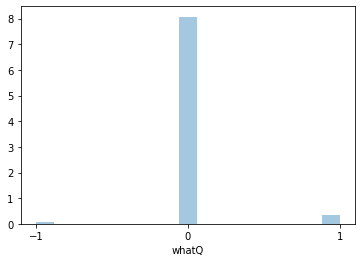

In [44]:
sns.distplot(yPredict-y_test)
plt.xticks([-1,0,1])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


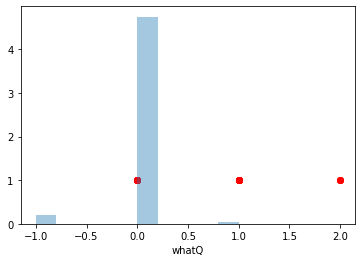

In [45]:
plt.scatter(y_test, yPredict, color = 'r');
sns.distplot(y_test - yPredict, bins=10)

In [46]:
print(logmodel.score(X_test, y_test))

0.95


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.95      1.00      0.97       304
           2       0.00      0.00      0.00         3

    accuracy                           0.95       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.95      0.93       320



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The logistic Regression scored 95%, slightly better than the knn did...

# Now for some Analysis

### Logistic Regression was about .7% more accurate than KNN when deciding whether the wine bad, medium, or good quality 

## Logistic is good for classifying, which is exactly what I was trying to do (low, medium, or high quality)

## What parts of wine have an affect on its quality?

In [48]:
df = pd.read_csv('winequality-red.csv', delimiter = ';')

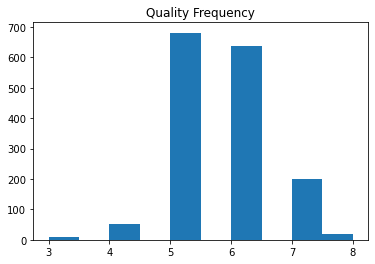

In [49]:
plt.hist(df['quality'])
plt.title('Quality Frequency')
plt.show()

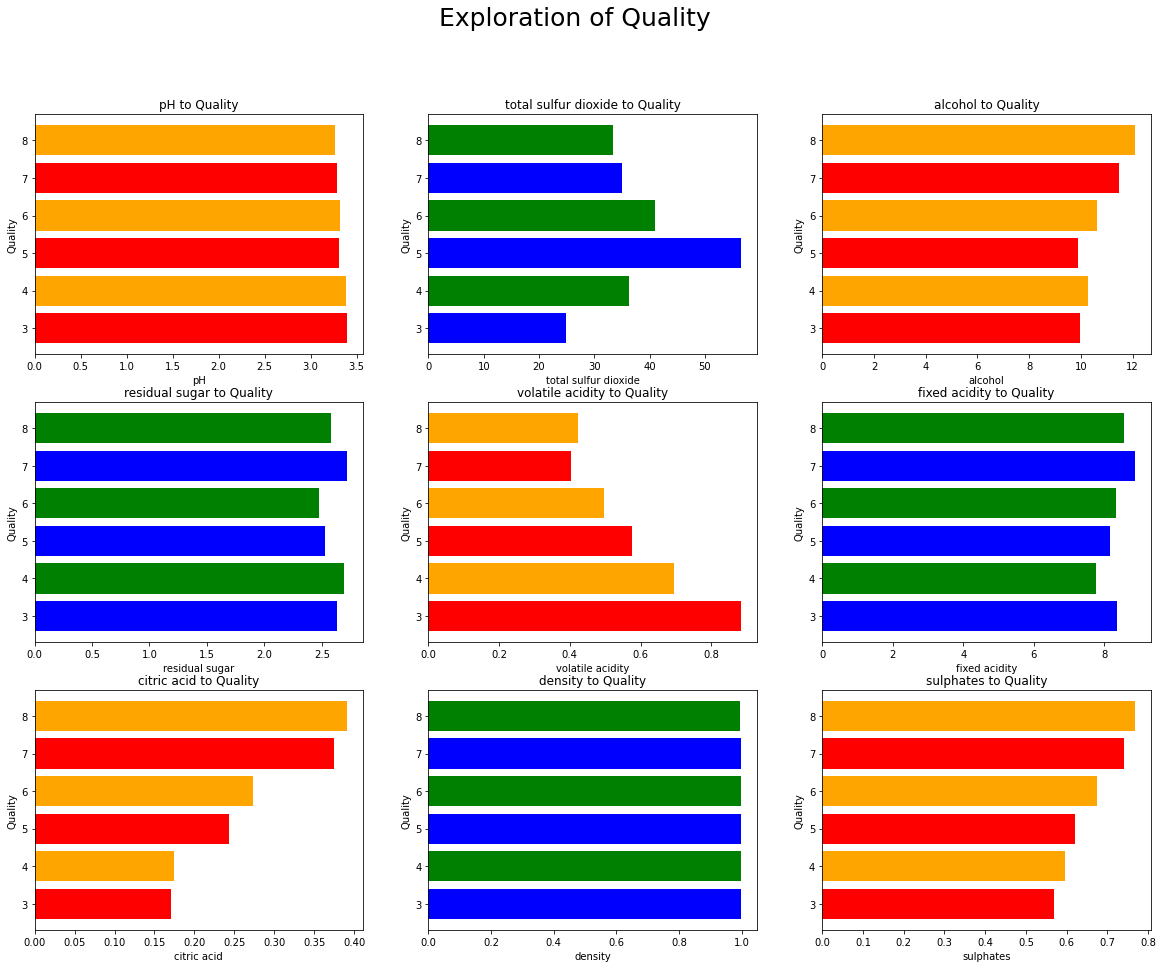

In [50]:
fig = plt.figure(figsize=(20,15))
axis1 = fig.add_subplot(3,3,1)
axis2 = fig.add_subplot(3,3,2)
axis3 = fig.add_subplot(3,3,3)
axis4 = fig.add_subplot(3,3,4)
axis5 = fig.add_subplot(3,3,5)
axis6 = fig.add_subplot(3,3,6)
axis7 = fig.add_subplot(3,3,7)
axis8 = fig.add_subplot(3,3,8)
axis9 = fig.add_subplot(3,3,9)

fig.suptitle('Exploration of Quality', fontsize = 25)

x = df.groupby('quality')['pH'].mean()
y = df.groupby('quality')['pH'].mean().keys()
axis1.barh(y,x, color = ['red', 'orange'])
axis1.set_xlabel('pH')
axis1.set_ylabel('Quality')
axis1.set_title('pH to Quality')

x = df.groupby('quality')['total sulfur dioxide'].mean()
y = df.groupby('quality')['total sulfur dioxide'].mean().keys()
axis2.barh(y,x, color = ['blue', 'green'])
axis2.set_xlabel('total sulfur dioxide')
axis2.set_ylabel('Quality')
axis2.set_title('total sulfur dioxide to Quality')

x = df.groupby('quality')['alcohol'].mean()
y = df.groupby('quality')['alcohol'].mean().keys()
axis3.barh(y,x, color = ['red', 'orange'])
axis3.set_xlabel('alcohol')
axis3.set_ylabel('Quality')
axis3.set_title('alcohol to Quality')

x = df.groupby('quality')['residual sugar'].mean()
y = df.groupby('quality')['residual sugar'].mean().keys()
axis4.barh(y,x, color = ['blue', 'green'])
axis4.set_xlabel('residual sugar')
axis4.set_ylabel('Quality')
axis4.set_title('residual sugar to Quality')

x = df.groupby('quality')['volatile acidity'].mean()
y = df.groupby('quality')['volatile acidity'].mean().keys()
axis5.barh(y,x, color = ['red', 'orange'])
axis5.set_xlabel('volatile acidity')
axis5.set_ylabel('Quality')
axis5.set_title('volatile acidity to Quality')

x = df.groupby('quality')['fixed acidity'].mean()
y = df.groupby('quality')['fixed acidity'].mean().keys()
axis6.barh(y,x, color = ['blue', 'green'])
axis6.set_xlabel('fixed acidity')
axis6.set_ylabel('Quality')
axis6.set_title('fixed acidity to Quality')

x = df.groupby('quality')['citric acid'].mean()
y = df.groupby('quality')['citric acid'].mean().keys()
axis7.barh(y,x, color = ['red', 'orange'])
axis7.set_xlabel('citric acid')
axis7.set_ylabel('Quality')
axis7.set_title('citric acid to Quality')

x = df.groupby('quality')['density'].mean()
y = df.groupby('quality')['density'].mean().keys()
axis8.barh(y,x, color = ['blue', 'green'])
axis8.set_xlabel('density')
axis8.set_ylabel('Quality')
axis8.set_title('density to Quality')

x = df.groupby('quality')['sulphates'].mean()
y = df.groupby('quality')['sulphates'].mean().keys()
axis9.barh(y,x, color = ['red', 'orange'])
axis9.set_xlabel('sulphates')
axis9.set_ylabel('Quality')
axis9.set_title('sulphates to Quality')

plt.show()

### The Red/Orange Graphs seem to show some sort of correlation, but the Blue/Green graphs do not seem to show correlation
### For example in the bottom left graph you can see that Red Wines with high Citric Acid are higher quality, and wines with less citric acid are lower quality

#### acidity seemed very important to determining the quality of a  red wine

### Another way to visualize the graphs above:

##### Boxplot of alcohol levels seperated by quality

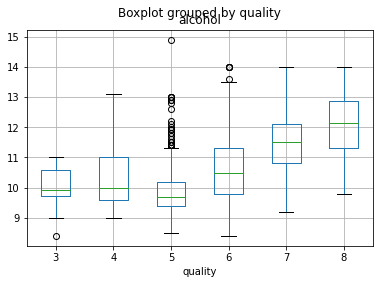

In [51]:
df.boxplot(column = 'alcohol', by = 'quality')

##### Pie Chart of Volatile Acidity by quality (as you can see, the lower the quality the more volatile acidity)

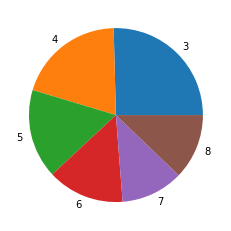

In [52]:
amount = df.groupby('quality')['volatile acidity'].mean()
car = df.groupby('quality')['volatile acidity'].mean().keys()
plt.pie(amount, labels = car)
plt.show()

#### How Common is each Quality?


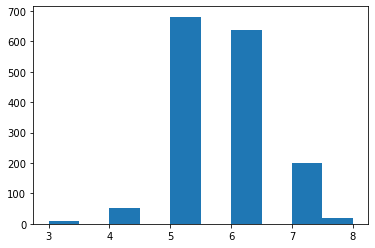

In [53]:
plt.hist(df['quality'])
plt.show()

### I discovered that there is a strong relationship between amount of alcohol and wine quality.
#### My hypothesis proved to be partially correct because quality was affected by alcohol levels, but many other things had an affect too.
### Some incidental but interesting discoveries I made was when i grouped the wine into 3 quality levels as opposed to 0-10, the accuracy improved tremendously.
#### The Logistic Regression machine learning algorithm performed the best , Perhaps because of the fact it was sorting into 3 groups. But both Knn and LogReg performed fine.